<a href="https://colab.research.google.com/github/aarav999-glitch/Simple-calculator-web-app2/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Step 2: Load Dataset
data = pd.read_csv("/content/expected_ctc.csv")


In [ ]:
print("Dataset Shape:", data.shape)

Dataset Shape: (25000, 29)


In [ ]:
print("\nColumns:", data.columns)


Columns: Index(['IDX', 'Applicant_ID', 'Total_Experience',
       'Total_Experience_in_field_applied', 'Department', 'Role', 'Industry',
       'Organization', 'Designation', 'Education', 'Graduation_Specialization',
       'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization',
       'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization',
       'University_PHD', 'Passing_Year_Of_PHD', 'Curent_Location',
       'Preferred_location', 'Current_CTC', 'Inhand_Offer',
       'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC'],
      dtype='object')


In [ ]:
print("\nSample Data:\n", data.head())


Sample Data:
    IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

       Department               Role   Industry Organization      Designation  \
0             NaN                NaN        NaN          NaN              NaN   
1              HR         Consultant  Analytics            H               HR   
2  Top Management         Consultant   Training            J              NaN   
3         Banking  Financial Analyst   Aviation            F               HR   
4           Sales    Project Manager  Insurance            E  Medical Officer   

   Education  ... Curent_Location P

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
print("\nDataset Info:\n")
print(data.info())



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    188

In [ ]:
print("\nMissing Values:\n", data.isnull().sum())

print("\nSummary Statistics:\n")
print(data.describe(include="all"))



Missing Values:
 IDX                                      0
Applicant_ID                             0
Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                        

In [ ]:
# Step 4: Data Preprocessing
# Handle categorical variables using Label Encoding
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col].astype(str))

print("\nData after Label Encoding:\n", data.head())



Data after Label Encoding:
    IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

   Department  Role  Industry  Organization  Designation  Education  ...  \
0          12    24        11            16           18          2  ...   
1           5     6         0             7            5          0  ...   
2          11     6        10             9           18          0  ...   
3           2     8         2             5            5          0  ...   
4          10    14         6             4            8          1  ...   

   Curent_Location  Preferred_location  Current_CTC

In [ ]:
# Step 5: Define Features (X) and Target (y)
X = data.drop("Expected_CTC", axis=1)   # independent variables
y = data["Expected_CTC"]                # target variable

In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X.fillna(-1), y, test_size=0.2, random_state=42
)

# Step 7: Build Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 8: Model Evaluation
y_pred = model.predict(X_test)

print("\nModel Performance Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))


Model Performance Metrics:
Mean Absolute Error (MAE): 120397.49160417008


In [ ]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


Mean Squared Error (MSE): 24741768859.06203


In [ ]:
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE): 157295.16476695027


In [ ]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.9817063196453445


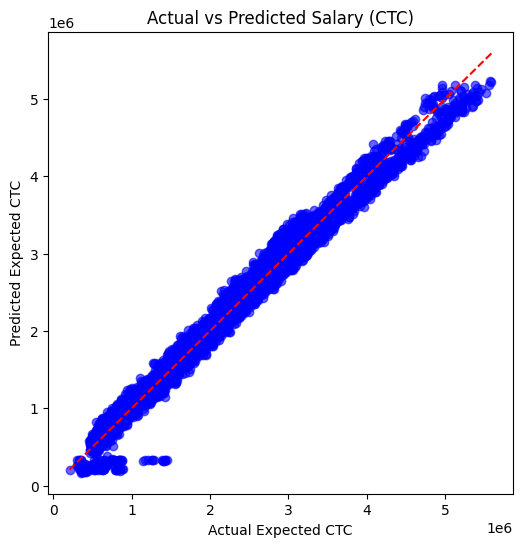

In [ ]:
# Step 9: Visualization of Predictions
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Expected CTC")
plt.ylabel("Predicted Expected CTC")
plt.title("Actual vs Predicted Salary (CTC)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()

In [ ]:
# Step 10: Predict New Candidate Salary
# Example input (replace values according to your dataset columns)
# Suppose dataset has columns like: experience, education, role, skills, etc.
sample_input = X.iloc[0].values.reshape(1, -1)  # take first row as test
sample_input = np.nan_to_num(sample_input, nan=-1) # Fill NaN values with -1
predicted_salary = model.predict(sample_input)
print("\nPredicted Salary for Sample Candidate:", predicted_salary[0])


Predicted Salary for Sample Candidate: 195004.2952922544


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Compute correlation with Expected_CTC
corr_matrix = data.corr(numeric_only=True)
target_corr = corr_matrix["Expected_CTC"].drop("Expected_CTC")

# Get top 5 correlated features
top5_features = target_corr.abs().sort_values(ascending=False).head(5)

print("Top 5 features correlated with Expected_CTC:")
print(top5_features)

Top 5 features correlated with Expected_CTC:
Current_CTC                   0.986718
Passing_Year_Of_PHD           0.834222
Total_Experience              0.816593
Passing_Year_Of_Graduation    0.758694
Passing_Year_Of_PG            0.530964
Name: Expected_CTC, dtype: float64


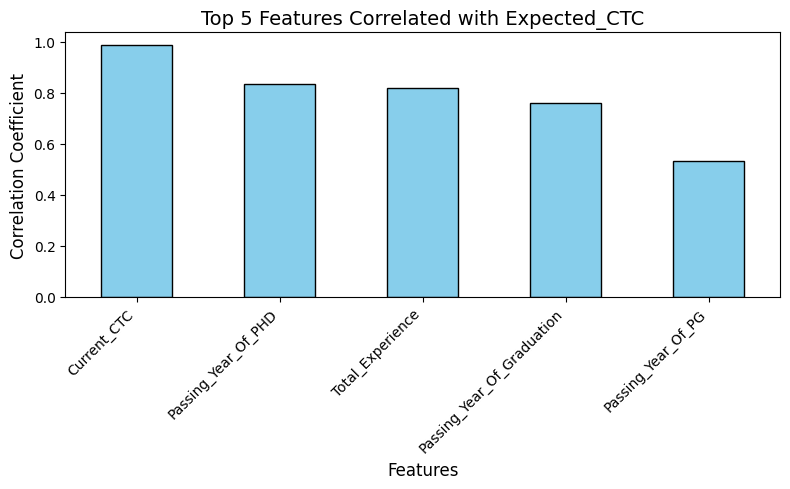

In [ ]:
# Compute correlation with Expected_CTC
corr_matrix = data.corr(numeric_only=True)
target_corr = corr_matrix["Expected_CTC"].drop("Expected_CTC")

# Get top 5 correlated features
top5_features = target_corr.abs().sort_values(ascending=False).head(5)

# Plot bar chart
plt.figure(figsize=(8, 5))
top5_features.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 5 Features Correlated with Expected_CTC", fontsize=14)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# Correlation between Total Experience and Current CTC
if "total_experience" in data.columns and "current_ctc" in data.columns:
    correlation = data["total_experience"].corr(data["current_ctc"])
    print("\nCorrelation between Total Experience and Current CTC:", correlation)

    # Scatter Plot
    plt.figure(figsize=(7,5))
    sns.scatterplot(x="total_experience", y="current_ctc", data=data)
    plt.title("Total Experience vs Current CTC")
    plt.xlabel("Total Experience (years)")
    plt.ylabel("Current CTC")
    plt.show()


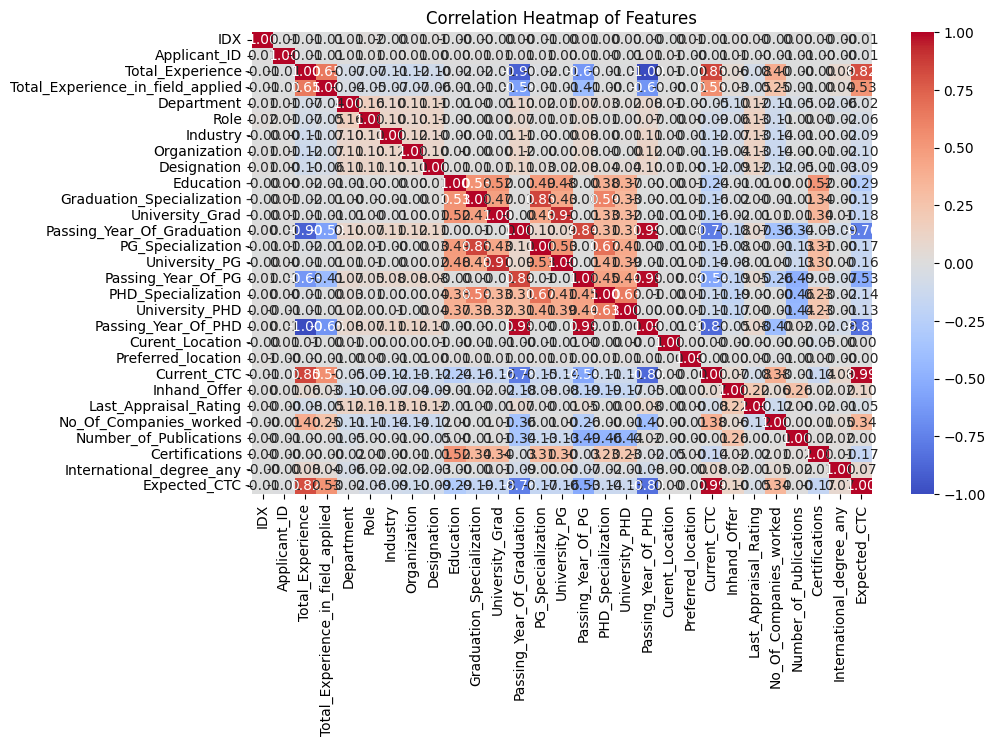

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()



Feature Importances (Random Forest):
                               Feature  Importance
21                        Current_CTC    0.985208
23              Last_Appraisal_Rating    0.007956
9                           Education    0.004161
22                       Inhand_Offer    0.000819
18                Passing_Year_Of_PHD    0.000548
16                 PHD_Specialization    0.000357
2                    Total_Experience    0.000174
10          Graduation_Specialization    0.000115
12         Passing_Year_Of_Graduation    0.000093
13                  PG_Specialization    0.000069
11                    University_Grad    0.000059
0                                 IDX    0.000049
1                        Applicant_ID    0.000044
17                     University_PHD    0.000037
15                 Passing_Year_Of_PG    0.000036
14                      University_PG    0.000033
7                        Organization    0.000032
20                 Preferred_location    0.000032
19         

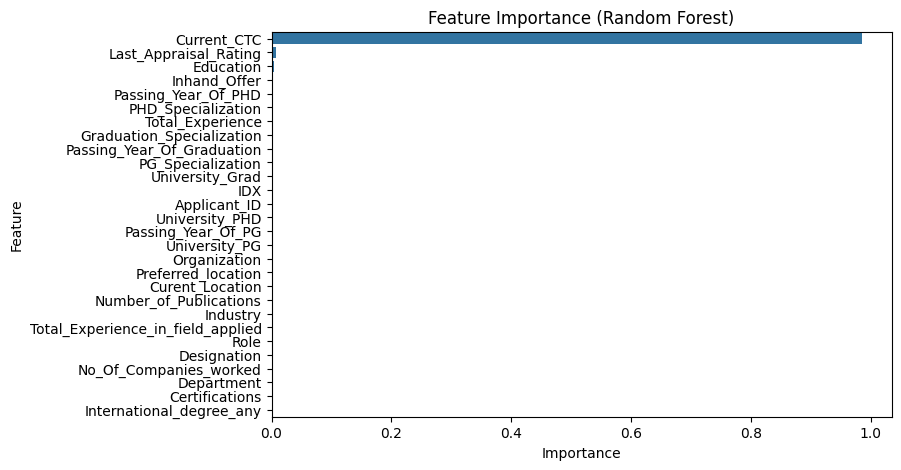

In [ ]:
# Feature importance (Random Forest)
from sklearn.ensemble import RandomForestRegressor

# Build and train a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances (Random Forest):\n", feature_importance_df)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()

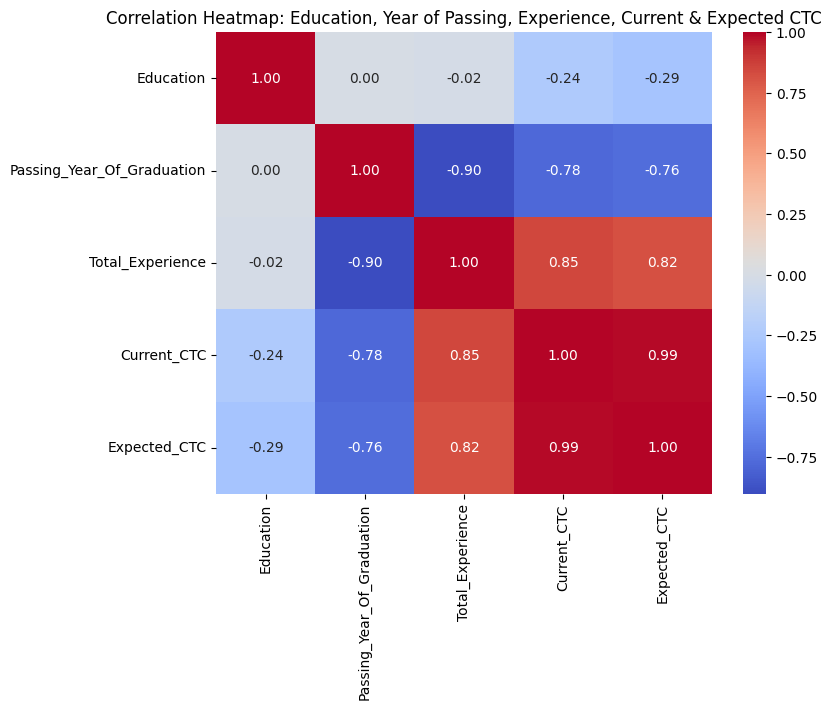

In [ ]:
# 🔹 Focused Correlation Heatmap
selected_cols = ["Education", "Passing_Year_Of_Graduation", "Total_Experience", "Current_CTC", "Expected_CTC"]

# Check if all exist in dataset
available_cols = [col for col in selected_cols if col in data.columns]

corr_matrix = data[available_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Education, Year of Passing, Experience, Current & Expected CTC")
plt.show()

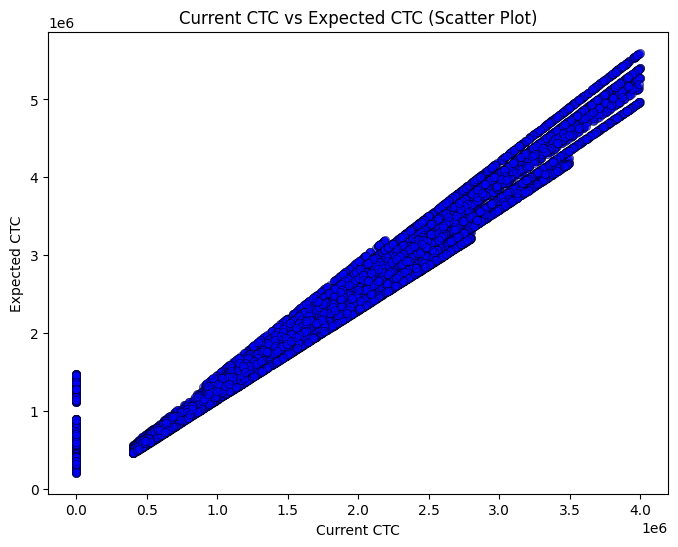

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data["Current_CTC"], y=data["Expected_CTC"], alpha=0.6, color="blue", edgecolor="k")
plt.xlabel("Current CTC")
plt.ylabel("Expected CTC")
plt.title("Current CTC vs Expected CTC (Scatter Plot)")
plt.show()

<Figure size 1200x600 with 0 Axes>

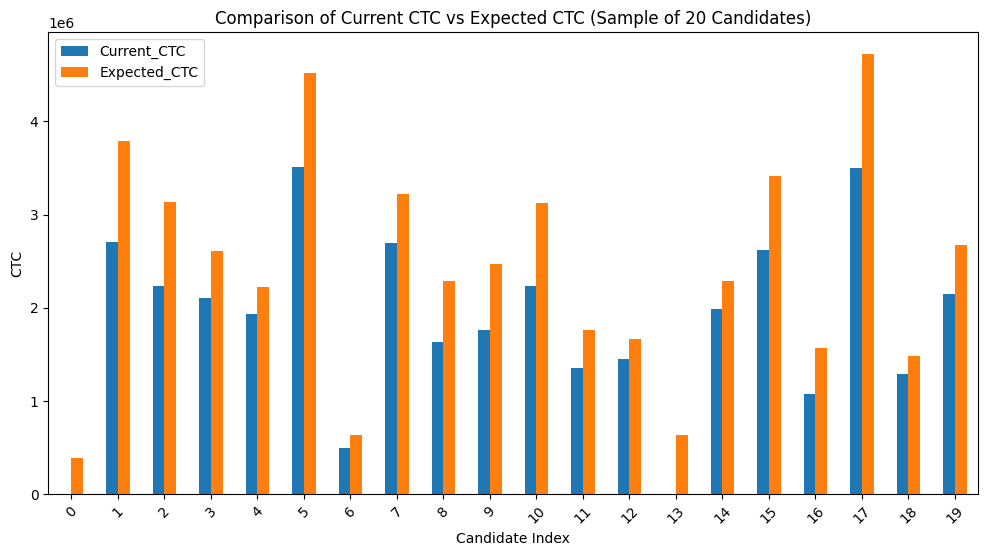

In [ ]:
sampled = data[["Current_CTC","Expected_CTC"]].head(20)

plt.figure(figsize=(12,6))
sampled.plot(kind="bar", figsize=(12,6))
plt.title("Comparison of Current CTC vs Expected CTC (Sample of 20 Candidates)")
plt.xlabel("Candidate Index")
plt.ylabel("CTC")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Handling missing values
data = data.fillna({"Department": "Unknown", "Role": "Unknown", "Industry": "Unknown", "Organization": "Unknown"})

# Drop columns with too many missing values if necessary
threshold = 0.4
data = data[data.columns[data.isnull().mean() < threshold]]

# Encode categorical features
from sklearn.preprocessing import OneHotEncoder
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
# Feature: Experience difference
data['Experience_Diff'] = data['Total_Experience'] - data['Total_Experience_in_field_applied']

# Feature: CTC per year of experience
data['CTC_per_Year'] = data['Current_CTC'] / (data['Total_Experience'] + 1)

# Feature: Education Level Numeric Encoding
edu_map = {"Grad": 1, "PG": 2, "Doctorate": 3}
data['Education_Level'] = data['Education'].map(edu_map).fillna(0)


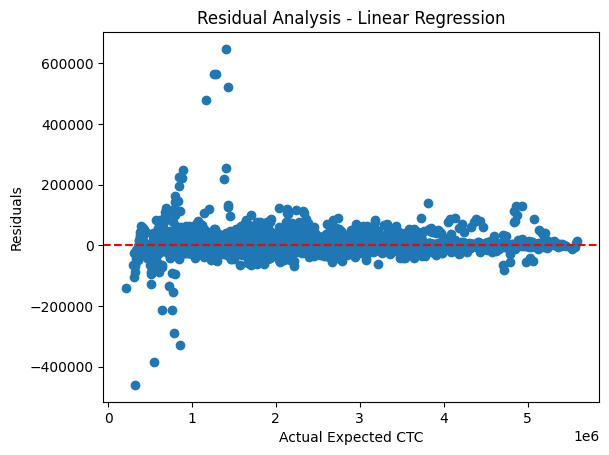

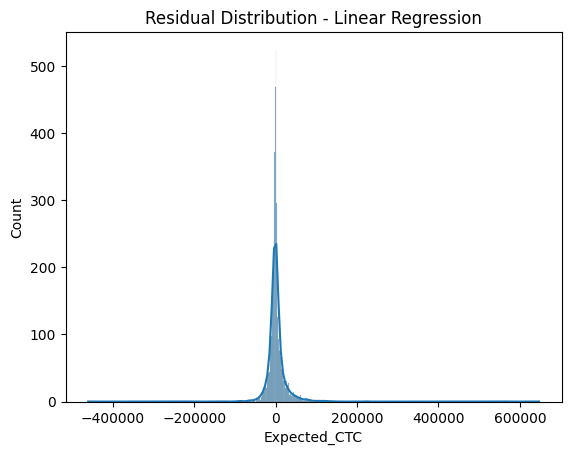

In [ ]:
import seaborn as sns

# Residuals for Linear Regression
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Expected CTC")
plt.ylabel("Residuals")
plt.title("Residual Analysis - Linear Regression")
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution - Linear Regression")
plt.show()